### Opening Image

In [4]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

PATH = './Image/example01.png'
img = cv2.imread(PATH)

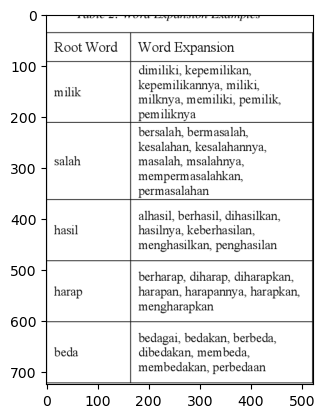

In [5]:
plt.imshow(img)
plt.show()

In [9]:
def display(path,gray=False):
    dpi = 80
    image_data = plt.imread(path)
    if gray:
        height, width, = image_data.shape
    else:
        height, width, shape = image_data.shape
    
    figsize = width / float(dpi), height / float(dpi)
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])
    
    ax.axis('off')
    
    ax.imshow(image_data, cmap='gray',vmin=0, vmax=255)
    
    plt.show()

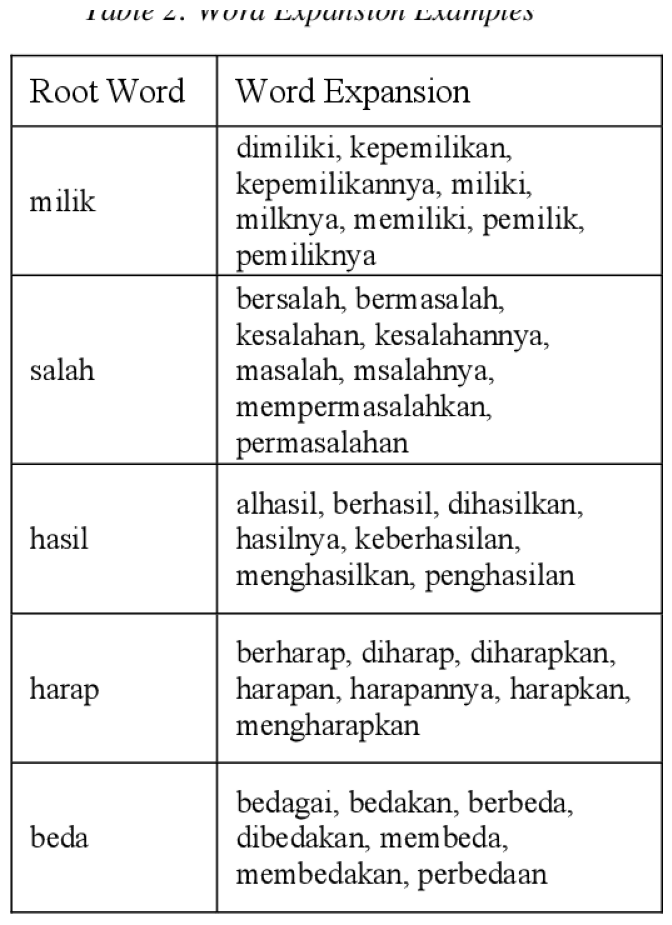

In [10]:
display(PATH)

### Inverted Images

In [11]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite('./Image/inverted_image01.jpg',inverted_image)

True

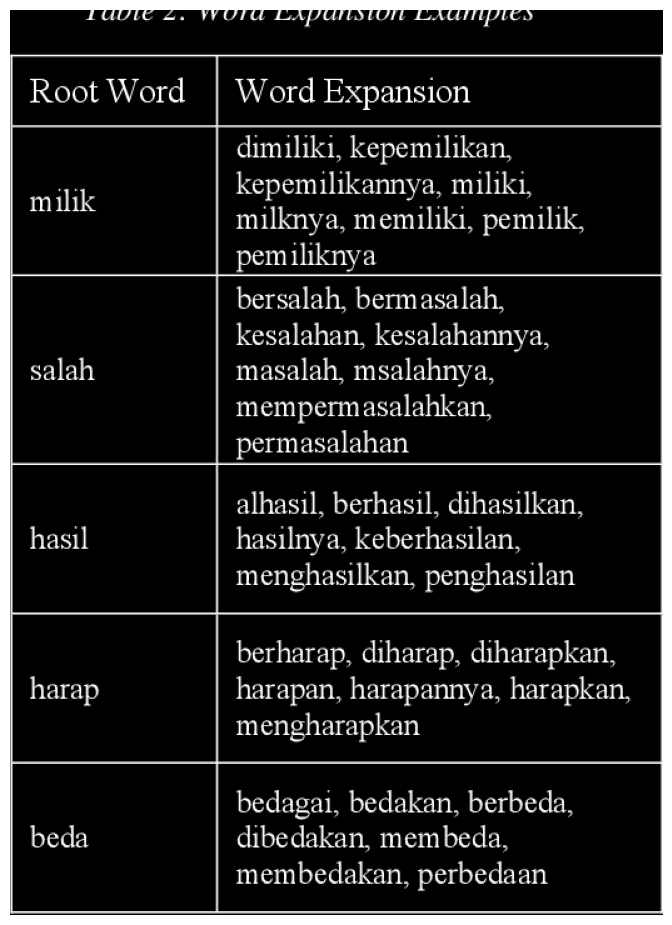

In [12]:
display('./Image/inverted_image01.jpg')

### Rescaling

### Binarization

In [13]:
def grayscale(image):
    return cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [14]:
gray_image = grayscale(img)
cv2.imwrite('./Image/gray_example01.jpg',gray_image)

True

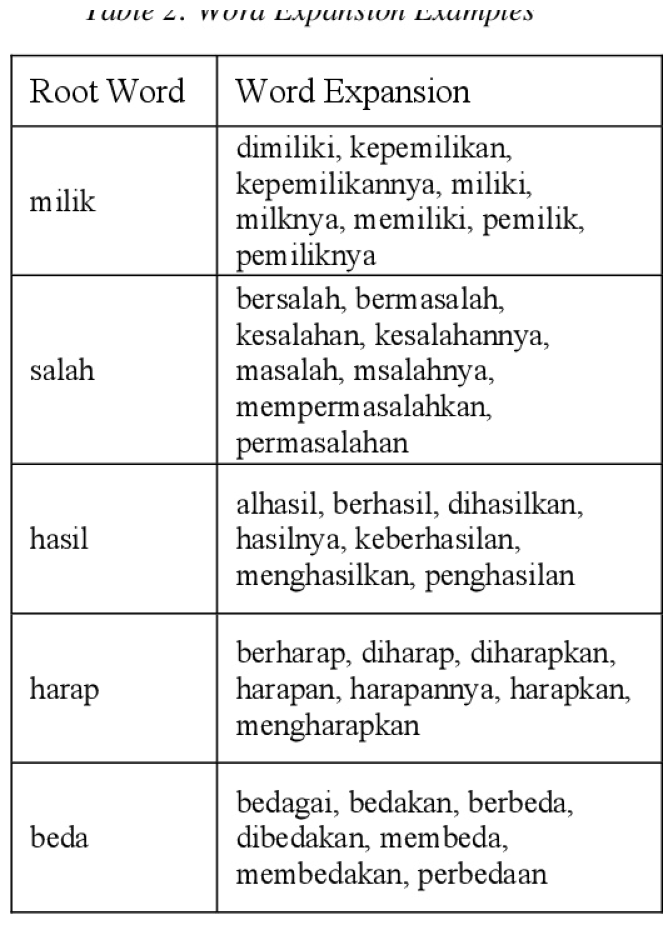

In [16]:
display('./Image/gray_example01.jpg',gray=True)

In [17]:
tresh, image_bw = cv2.threshold(gray_image, 200, 233 , cv2.THRESH_BINARY)
cv2.imwrite('./Image/bw_image.jpg',image_bw)

True

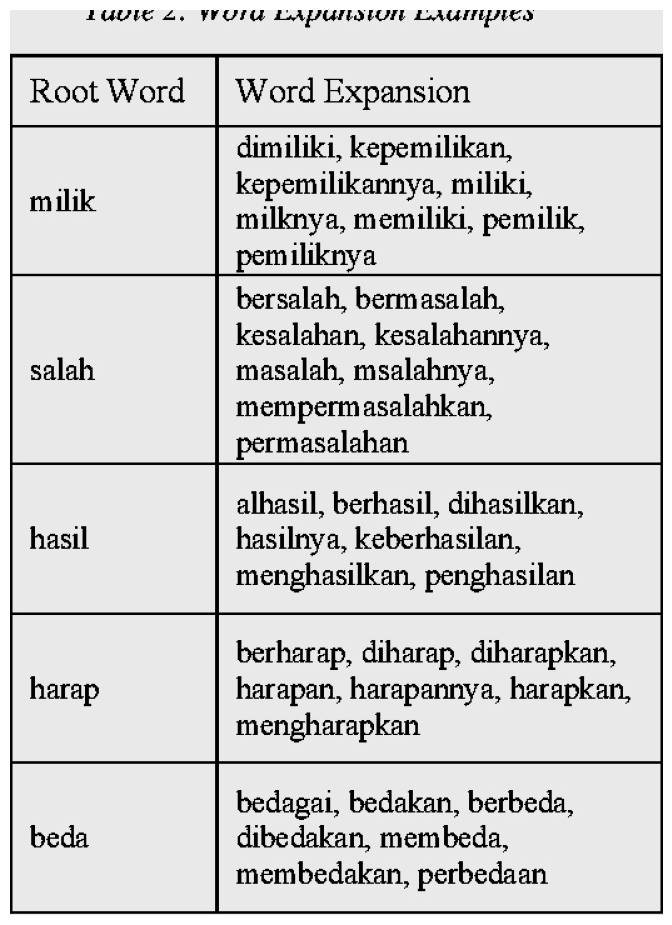

In [19]:
display('./Image/bw_image.jpg',gray=True)

### Noise Removal

In [20]:
def noise_removal(image):
    kernel = np.ones((1,1),np.uint8)
    image = cv2.dilate(image,kernel,iterations=1)
    image = cv2.erode(image,kernel,iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image,3)
    return (image)

In [23]:
no_noise = noise_removal(image_bw)
cv2.imwrite('./Image/no_noise_bw_image.jpg',no_noise)

True

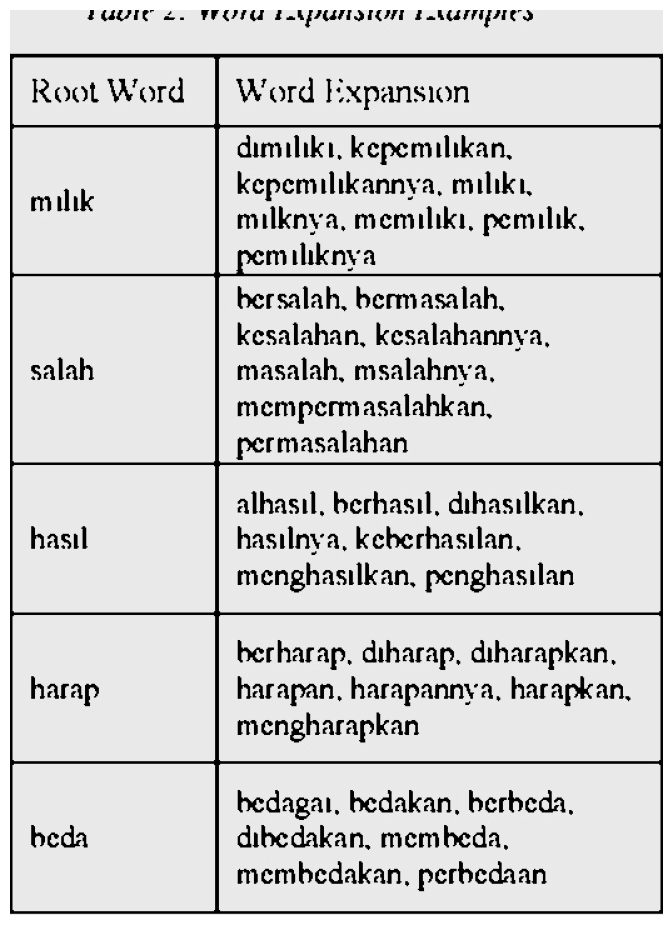

In [25]:
display('./Image/no_noise_bw_image.jpg',gray=True)

### Dilation and Erosion

In [34]:
def thin_front(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image,kernel,iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [35]:
eroded_image = thin_front(no_noise)
cv2.imwrite('./Image/eroded_no_noise_bw_image.jpg',eroded_image)

True

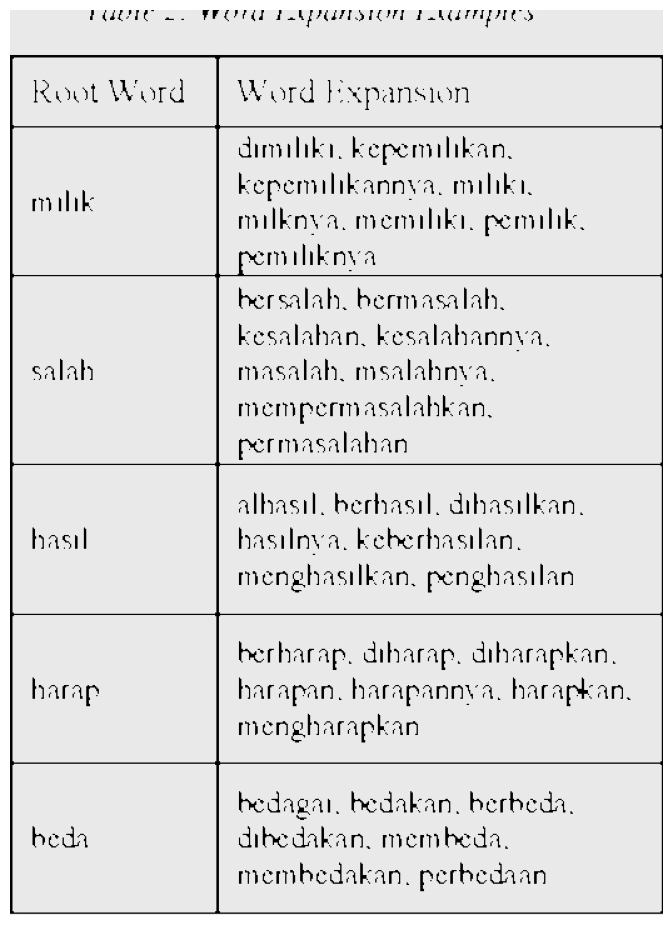

In [36]:
display('./Image/eroded_no_noise_bw_image.jpg',gray=True)

In [39]:
def thick_front(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image,kernel,iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [42]:
dilated_image = thick_front(no_noise)
cv2.imwrite('./Image/dilated_image_bw.jpg',dilated_image)

True

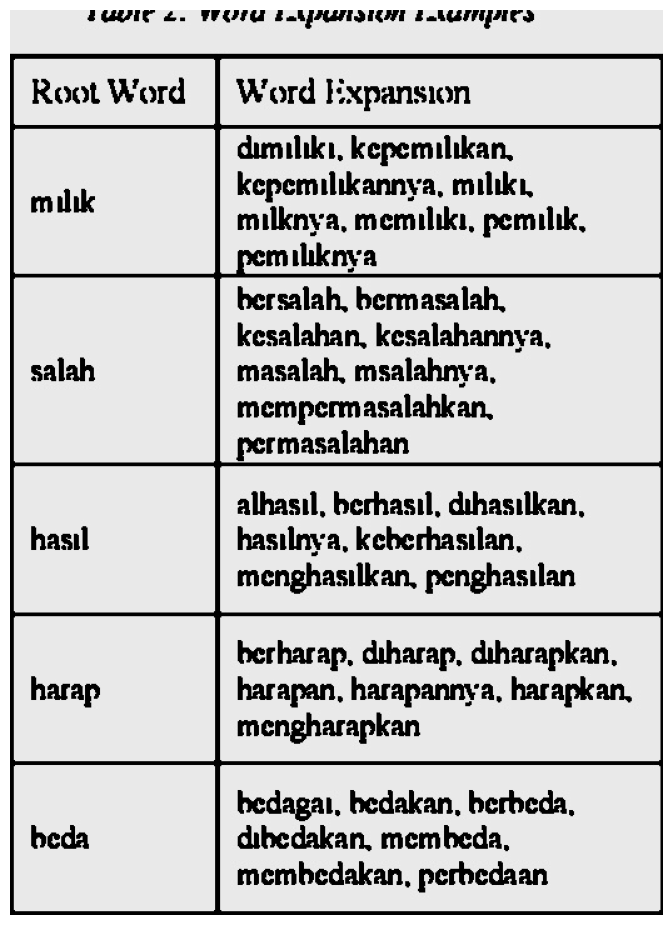

In [44]:
display('./Image/dilated_image_bw.jpg',gray=True)

### Rotation / Deskewing

In [71]:
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cv2.imread(cvImage)
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle

# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cv2.imread(cvImage)
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

In [72]:
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [66]:
# tes = cv2.imread('./Image/example02.jpg')
# cv2.cvtColor(tes,cv2.COLOR_BGR2GRAY)

In [74]:
fixed = deskew('./Image/example02.jpg')
cv2.imwrite("./Image/rotated_fixed.jpg", fixed)

22


True

### Removes Border

In [75]:
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

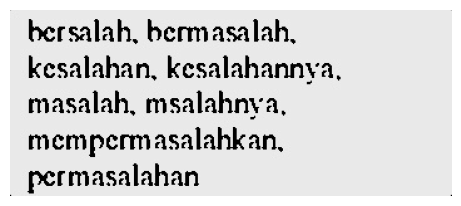

In [78]:
no_borders = remove_borders(no_noise)
cv2.imwrite("./Image/no_borders.jpg", no_borders)
display("./Image/no_borders.jpg",gray=True)

### Missing Borders

In [79]:
color = [255, 255, 255]
top, bottom, left, right = [150]*4

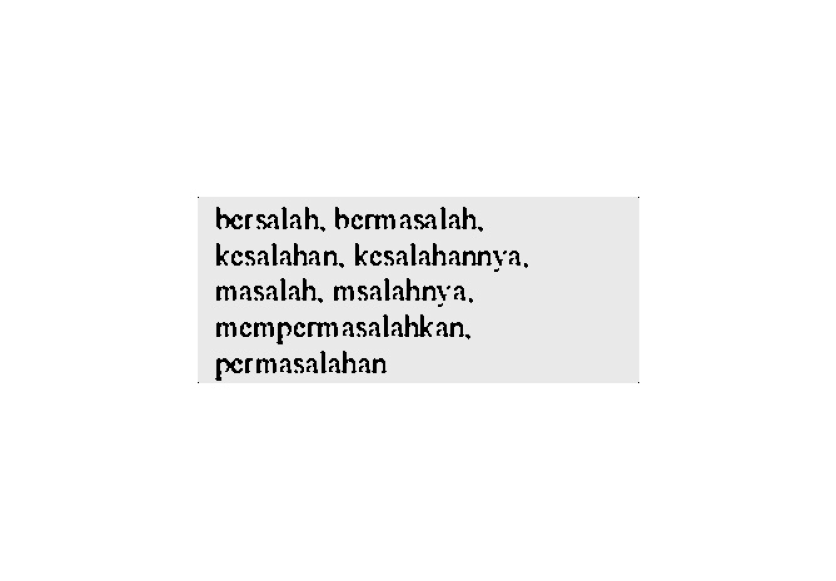

In [82]:
image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite("./Image/image_with_border.jpg", image_with_border)
display('./Image/image_with_border.jpg',gray=True)